In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import time

import requests
from bs4 import BeautifulSoup
from urllib import parse

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# **Browser Setting**

In [2]:
### Chrome web 사용.
options = webdriver.ChromeOptions()                     # Chrome 창의 옵션을 설정할 수 있는 코드.
options.add_argument('--no-sandbox')                    
options.add_argument('--disable-dev-shm-usage')         
options.add_argument('--headless')                      # headless : Broswer 창을 띄우지 않고 수행 (colab에서는 필수).
# options.add_argument("window-size = 1920,1080")       # window size 설정


browser = webdriver.Chrome(options = options)           # 위 Option을 적용한 Chrome 창을 실행.
browser.maximize_window()                               # browser 창 최대화

# **Lotto number**

## **_네이버 -> 로또번호 검색**

In [3]:
### 페이지 이동
url = "https://www.naver.com"
browser.get(url)

### 유튜버 검색
elem = browser.find_element(By.NAME, "query")
elem.send_keys("로또 번호")
elem.send_keys(Keys.ENTER)
time.sleep(2)   # 검색 완료까지 대기. 

## **_로또 번호**

- 가장 최신 번호 = 전주 로또 번호

In [4]:
html = requests.get(browser.current_url)
soup = BeautifulSoup(html.text, 'html.parser')

bf_turn_ = soup.find(name = 'div', attrs = {'class': 'select_tab'}).find("a").text
bf_win_ = soup.find(name = 'div', attrs = {'class': 'winning_number'})

bf_win_num, bf_bonus_num = [], []
for i in range(6) :
    bf_win_num.append(int(bf_win_.findAll("span")[i].text))  # list에 넣어서 결과 보기

bf_bonus_num.append(int(soup.find('div', {'class': 'bonus_number'}).find("span").text))

browser.quit()

In [5]:
print(bf_turn_ + " LOTTO 당첨 번호: ", bf_win_num, "| 보너스 번호: ", bf_bonus_num)

1066회차 (2023.05.06.) LOTTO 당첨 번호:  [6, 11, 16, 19, 21, 32] | 보너스 번호:  [45]


## **_로또 번호 선택**

In [6]:
### 똥손이 뽑은 번호
shit_hand = {"BF" : bf_win_num + bf_bonus_num,
             "DH" : [1,17,31,41,36,8],
             "HW" : [1,2,3,21,33,28],
             "JY" : [1,4,11,12,22,25],
             "HJ" : [23,36,18,7,9,6],
             "FR" : [3,5,19,24,12,25],
             }

In [7]:
### 똥손이 뽑은 번호 제거
except_num = sum(list(shit_hand.values()), [])
except_num = sorted(set(except_num))

### 로또 번호 중 똥손 번호 제외하고 남은 번호
lotto_num = list(range(1, 46))
select_num = sorted(list(set(lotto_num) - set(except_num)))

print("전체 로또 번호 수: %d개| 제거된 로또 번호 수: %d개| 남은 로또 번호 수: %d개" % (len(lotto_num), len(except_num), len(select_num)))
print("남은 개수 : ", len(select_num))
select_num[:5]

전체 로또 번호 수: 45개| 제거된 로또 번호 수: 27개| 남은 로또 번호 수: 18개
남은 개수 :  18


[10, 13, 14, 15, 20]

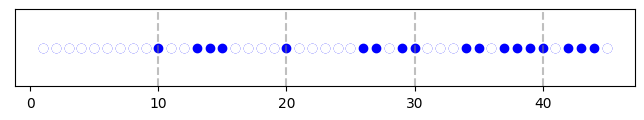

In [8]:
### 남은 숫자의 분포도
plt.figure(figsize = (8, 1))
plt.scatter(lotto_num, y = [1]*45, color = "blue")
plt.scatter(except_num, y = [1]*len(except_num), color = "white")
plt.yticks([])
[plt.axvline(x_, alpha = .5, color = "gray", linestyle = "--") for x_ in range(10,50,10)];

In [9]:
### 남은 숫자 중 랜덤으로 6개씩 5번 출력
random.seed(717)
for i in range(5) :
    print(sorted(random.sample(select_num, 6)))

[13, 15, 20, 29, 42, 44]
[10, 13, 26, 34, 35, 37]
[10, 34, 35, 37, 39, 40]
[27, 30, 34, 39, 40, 42]
[14, 29, 30, 38, 39, 42]


# **당첨 번호 확인**

In [11]:
### Chrome web 사용.
options = webdriver.ChromeOptions()                     # Chrome 창의 옵션을 설정할 수 있는 코드.
options.add_argument('--no-sandbox')                    
options.add_argument('--disable-dev-shm-usage')         
options.add_argument('--headless')                      # headless : Broswer 창을 띄우지 않고 수행 (colab에서는 필수).
# options.add_argument("window-size = 1920,1080")       # window size 설정


browser = webdriver.Chrome(options = options)           # 위 Option을 적용한 Chrome 창을 실행.
browser.maximize_window()                               # browser 창 최대화

In [12]:
### 페이지 이동
url = "https://www.naver.com"
browser.get(url)

### 유튜버 검색
elem = browser.find_element(By.NAME, "query")
elem.send_keys("로또 번호")
elem.send_keys(Keys.ENTER)
time.sleep(2)   # 검색 완료까지 대기. 

### 당첨 번호 추출
html = requests.get(browser.current_url)
soup = BeautifulSoup(html.text, 'html.parser')

prize_turn_ = soup.find(name = 'div', attrs = {'class': 'select_tab'}).find("a").text
prize_win_ = soup.find(name = 'div', attrs = {'class': 'winning_number'})

prize_win_num, prize_bonus_num = [], []
for i in range(6) :
    prize_win_num.append(int(prize_win_.findAll("span")[i].text))  # list에 넣어서 결과 보기

prize_bonus_num.append(int(soup.find('div', {'class': 'bonus_number'}).find("span").text))

browser.quit()

In [14]:
prize = prize_win_num + prize_bonus_num

print("="*10, "똥손 별 당첨된 번호 개수", "="*10)

for name_, num_ in shit_hand.items() :
    cnt = len(set(num_) & set(prize))
    print("%s : %d개" % (name_, cnt), set(num_) & set(prize))
    
print("\n똥손들이 안 뽑은 숫자 중 당첨 숫자 : ", set(prize) & set(select_num))
print("똥손들이 뽑은 숫자 중 당첨 숫자 : ", set(prize) & set(except_num))

========== 똥손 별 당첨된 번호 개수 ==========
BF : 7개 {32, 6, 11, 45, 16, 19, 21}
DH : 0개 set()
HW : 1개 {21}
JY : 1개 {11}
HJ : 1개 {6}
FR : 1개 {19}

똥손들이 안 뽑은 숫자 중 당첨 숫자 :  set()
똥손들이 뽑은 숫자 중 당첨 숫자 :  {32, 6, 11, 45, 16, 19, 21}
